<a href="https://colab.research.google.com/github/maguid28/CS6271-EvolutionaryComputation/blob/main/Week04Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Number: 23222425

#Student Name: Daniel Maguire

##Comments:



The best individual found was using:

P_CROSSOVER=0.30000000000000004, P_MUTATION=0.11, penalty_weight=46, penalty_multiplier=1.2000000000000002
Fitness of Best Individual Overall =  281.0
Total Weight for the Best Individual Overall:  991

   # 0-1 Knapsack Problem

In [ ]:
!pip install deap

Import the DEAP tools and useful libraries (random and matplotlib).

In [ ]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

In [ ]:
NBR_ITEMS = 100
MAX_WEIGHT = 1000

# set the random seed. Make sure you do this BEFORE creating the knapsack
# creating the knapsack
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Create the item dictionary: item name is an integer, and value is
# a (value, weight) 2-uple.

items = {}

# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
     items[i] = (random.randint(1, 10), random.randint(1, 100))

In [ ]:
# Genetic Algorithm constants:
# DO NOT TOUCH
POPULATION_SIZE = 500

P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 1/NBR_ITEMS   # probability for mutating an individual
MAX_GENERATIONS = 100000

In [ ]:
penalty_weight = 5

print("print penalty_weight: " + str(penalty_weight))

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, NBR_ITEMS)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# knapsack fittness function
def knapsackFitness(individual, penalty_weight):
    total_weight = 0.0
    total_value = 0.0
    for (selected, (item_value, item_weight)) in zip(individual, items.values()):
        if selected:
            total_weight += item_weight
            total_value += item_value

    if total_weight > MAX_WEIGHT:
        penalty = penalty_weight * (total_weight - MAX_WEIGHT)
        total_value -= penalty
        penalty_weight = penalty_weight * 45
    return total_value,







print penalty_weight: 5


GA

In [ ]:
def genetic_algorithm(P_CROSSOVER=0.7, P_MUTATION=0.1,penalty_weight=1,penalty_multiplier=1):

  #toolbox.register("evaluate", knapsackFitness, penalty_weight=penalty_weight)
  toolbox.register("evaluate", lambda ind: knapsackFitness(ind, penalty_weight))

  # genetic operators:

  # Tournament selection with tournament size of 2:
  toolbox.register("select", tools.selTournament, tournsize=2)

  # Single-point crossover:
  toolbox.register("mate", tools.cxOnePoint)

  # Flip-bit mutation:
  # indpb: Independent probability for each attribute to be flipped
  toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/NBR_ITEMS)

  previousBestFitness = 0
  stagnantGenerations = 0

  best_individual_overall = None
  best_fitness_overall = 0
  best_weight_overall = 0

  # create initial population (generation 0):
  population = toolbox.populationCreator(n=POPULATION_SIZE)
  generationCounter = 0

  # calculate fitness tuple for each individual in the population:
  fitnessValues = list(map(toolbox.evaluate, population))
  for individual, fitnessValue in zip(population, fitnessValues):
      individual.fitness.values = fitnessValue

  # extract fitness values from all individuals in population:
  fitnessValues = [individual.fitness.values[0] for individual in population]

  # initialize statistics accumulators:
  maxFitnessValues = []
  meanFitnessValues = []

  # main evolutionary loop:
  # stop if max fitness value reached the known max value
  # OR if number of generations exceeded the preset value:
  while generationCounter < MAX_GENERATIONS:
      # update counter:
      generationCounter = generationCounter + 1

      # apply the selection operator, to select the next generation's individuals:
      offspring = toolbox.select(population, len(population))
      # clone the selected individuals:
      offspring = list(map(toolbox.clone, offspring))

      # apply the crossover operator to pairs of offspring:
      for child1, child2 in zip(offspring[::2], offspring[1::2]):
          if random.random() < P_CROSSOVER:
              toolbox.mate(child1, child2)
              del child1.fitness.values
              del child2.fitness.values

      for mutant in offspring:
          if random.random() < P_MUTATION:
              toolbox.mutate(mutant)
              del mutant.fitness.values

      # calculate fitness for the individuals with no previous calculated fitness value:
      freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
      freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
      for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
          individual.fitness.values = fitnessValue

      # replace the current population with the offspring:
      population[:] = offspring

      # collect fitnessValues into a list, update statistics and print:
      fitnessValues = [ind.fitness.values[0] for ind in population]


      maxFitness = max(fitnessValues)
      meanFitness = sum(fitnessValues) / len(population)
      maxFitnessValues.append(maxFitness)
      meanFitnessValues.append(meanFitness)
      #print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

      best_index = fitnessValues.index(max(fitnessValues))
      #print("Best Individual = ", *population[best_index])

      best_individual = population[best_index]
      best_individual_weight = sum(item_weight for selected, (_, item_weight) in zip(best_individual, items.values()) if selected)

      if maxFitness > best_fitness_overall:
        best_fitness_overall = maxFitness
        best_individual_overall = population[best_index]
        best_weight_overall = best_individual_weight

      best_weight = sum(item[1] for i, item in enumerate(items.values()) if best_individual[i] == 1)
      #print("Total weight for the best individual: " + str(best_weight) +  "\n")

      if best_individual_weight > MAX_WEIGHT:
            penalty_weight *= penalty_multiplier
            #print("In genetic_algorithm, updated penalty_weight: " + penalty_weight)

      #stagnation check
      if previousBestFitness == maxFitness:
          stagnantGenerations += 1
      else:
          #reset if there's improvement
          stagnantGenerations = 0
      previousBestFitness = maxFitness
      if stagnantGenerations >= 25:
          break
  #if best_individual_overall is not None:
    #print("Best Individual Overall = ", *best_individual_overall)

  return maxFitnessValues, meanFitnessValues, best_fitness_overall, best_weight_overall




#Evaluation

This will search for the best parameters and print out the graph if the fitness score is above 250. (I was not interested in lower fitness scores, and 250 was a high but achievable result for my fitness function.)

###Best Fitness = 281.0, as seen in the last graph
P_CROSSOVER=0.30000000000000004, P_MUTATION=0.11, penalty_weight=46, penalty_multiplier=1.2000000000000002
Fitness of Best Individual Overall =  281.0
Total Weight for the Best Individual Overall:  991

------------------------------------------------
P_CROSSOVER=0.1, P_MUTATION=0.01, penalty_weight=25, penalty_multiplier=1.0
Fitness of Best Individual Overall =  263.0
Total Weight for the Best Individual Overall:  979


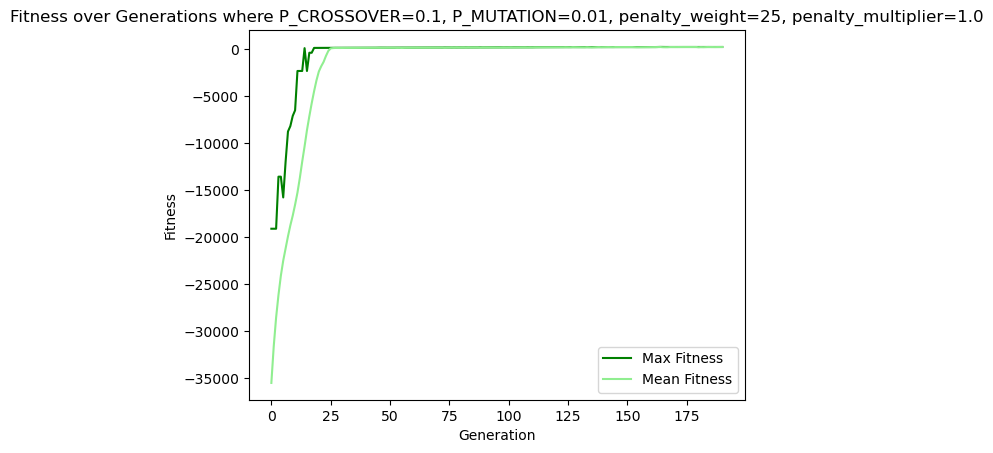

------------------------------------------------
P_CROSSOVER=0.1, P_MUTATION=0.11, penalty_weight=1, penalty_multiplier=1.0
Fitness of Best Individual Overall =  267.0
Total Weight for the Best Individual Overall:  991


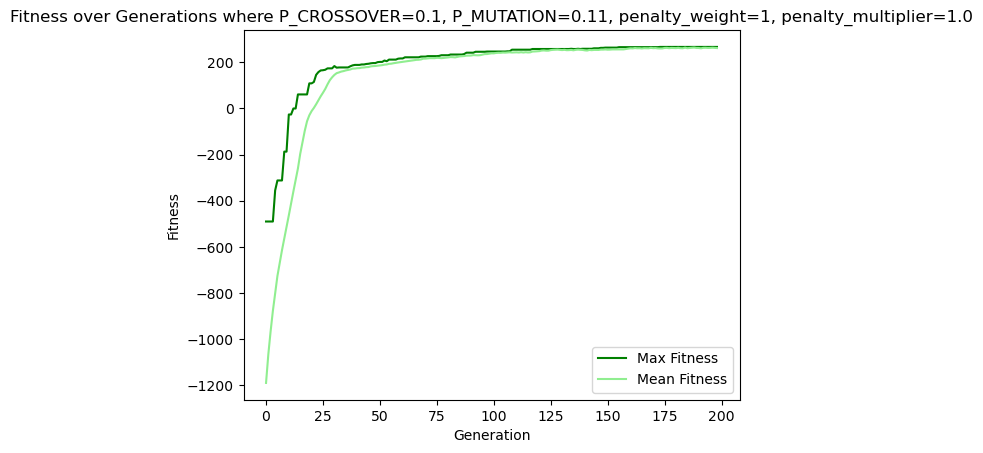

------------------------------------------------
P_CROSSOVER=0.1, P_MUTATION=0.11, penalty_weight=3, penalty_multiplier=1.0
Fitness of Best Individual Overall =  270.0
Total Weight for the Best Individual Overall:  990


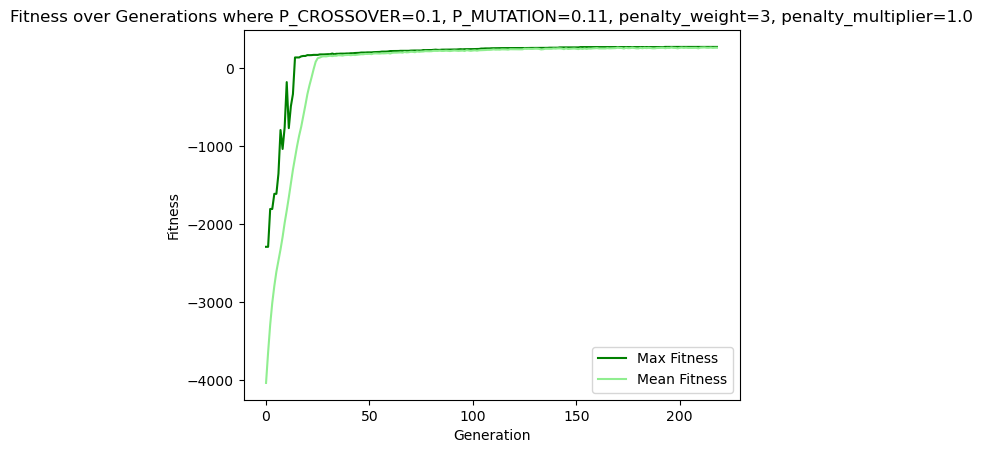

------------------------------------------------
P_CROSSOVER=0.1, P_MUTATION=0.11, penalty_weight=5, penalty_multiplier=1.0
Fitness of Best Individual Overall =  272.0
Total Weight for the Best Individual Overall:  995


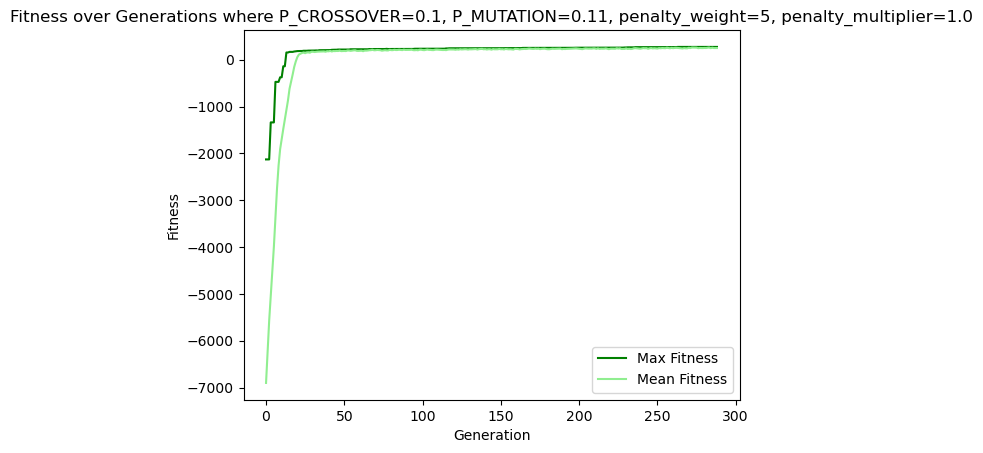

------------------------------------------------
P_CROSSOVER=0.1, P_MUTATION=0.11, penalty_weight=13, penalty_multiplier=1.0
Fitness of Best Individual Overall =  274.0
Total Weight for the Best Individual Overall:  992


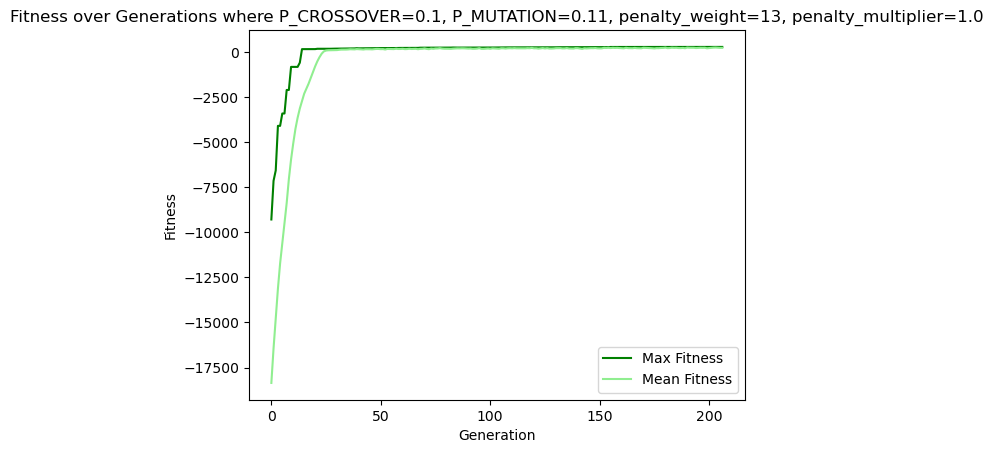

------------------------------------------------
P_CROSSOVER=0.1, P_MUTATION=0.11, penalty_weight=16, penalty_multiplier=1.1
Fitness of Best Individual Overall =  278.0
Total Weight for the Best Individual Overall:  995


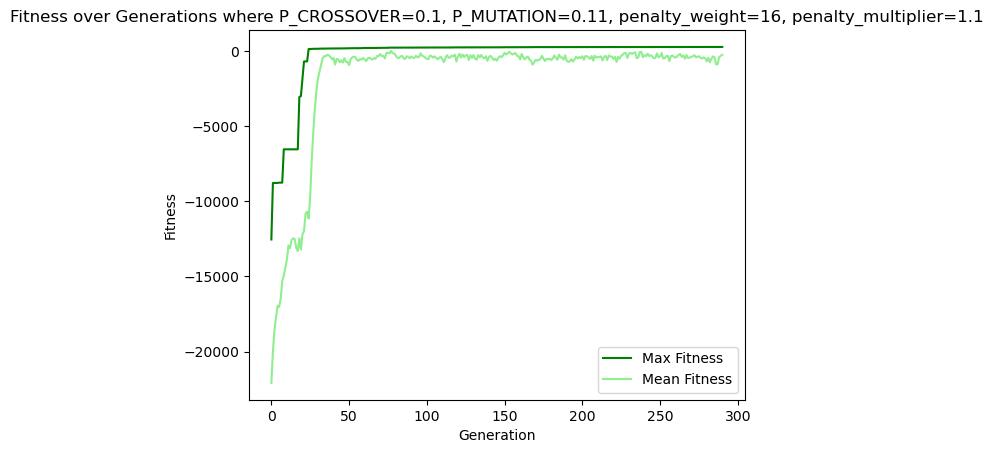

------------------------------------------------
P_CROSSOVER=0.30000000000000004, P_MUTATION=0.11, penalty_weight=40, penalty_multiplier=1.0
Fitness of Best Individual Overall =  279.0
Total Weight for the Best Individual Overall:  998


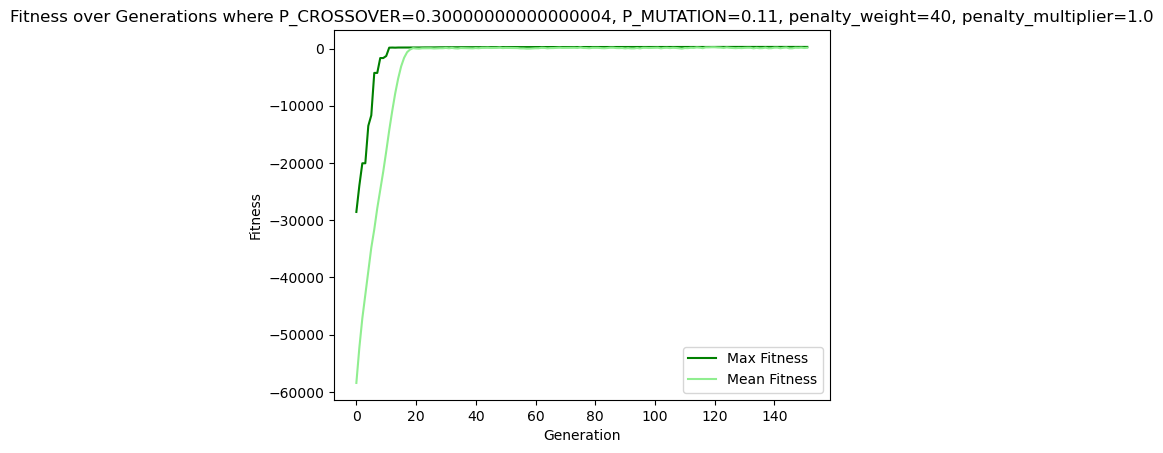

------------------------------------------------
P_CROSSOVER=0.30000000000000004, P_MUTATION=0.11, penalty_weight=46, penalty_multiplier=1.2000000000000002
Fitness of Best Individual Overall =  281.0
Total Weight for the Best Individual Overall:  991


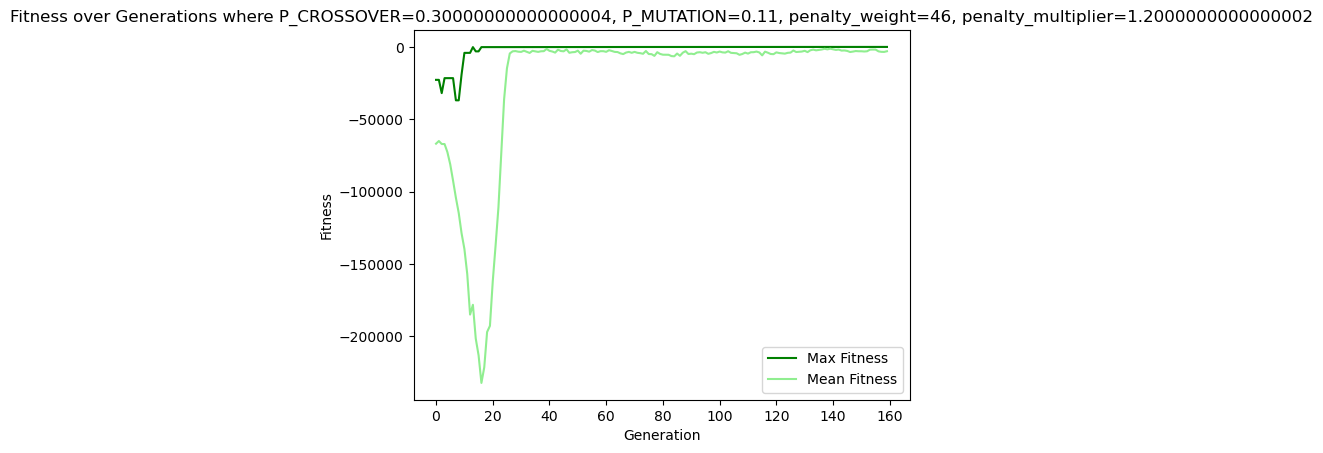

In [ ]:
import numpy as np

best_fitness_max = 0

for prob_of_crossover in np.arange(0.1, 1, 0.1):
    for prob_of_mutation in np.arange(0.01, 0.2, 0.1):
        for weight_penalty in np.arange(0, 50, 1):
            for multiplier in np.arange(1, 2, 0.1):
                for i in np.arange(0, 1, 1):
                    max_vals_1, mean_vals_1, best_fitness_overall, best_weight_overall = genetic_algorithm(
                                            P_CROSSOVER=prob_of_crossover,
                                            P_MUTATION=prob_of_mutation,
                                            penalty_weight=weight_penalty,
                                            penalty_multiplier=multiplier)


                    if best_fitness_overall is not None:
                      #print out the graph only if the fitness score is above 250 to keep more consise results.
                      if best_fitness_max < best_fitness_overall and best_weight_overall < 1000 and best_fitness_overall > 250:
                          print("------------------------------------------------")
                          print("P_CROSSOVER=" + str(prob_of_crossover)
                            + ", P_MUTATION=" + str(prob_of_mutation)
                            + ", penalty_weight=" + str(weight_penalty)
                            + ", penalty_multiplier=" + str(multiplier) )

                          print("Fitness of Best Individual Overall = ", best_fitness_overall)
                          print("Total Weight for the Best Individual Overall: ", best_weight_overall)
                          best_fitness_max = best_fitness_overall
                          plt.plot(max_vals_1, color='green', label='Max Fitness')
                          plt.plot(mean_vals_1, color='lightgreen', label='Mean Fitness')
                          plt.xlabel('Generation')
                          plt.ylabel('Fitness')
                          plt.title(
                              'Fitness over Generations where P_CROSSOVER=' + str(prob_of_crossover) +
                              ', P_MUTATION=' + str(prob_of_mutation) +
                              ', penalty_weight=' + str(weight_penalty) +
                              ', penalty_multiplier=' + str(multiplier))
                          plt.legend()
                          plt.show()


